In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#With 15 generations
global_res = pd.read_csv("./comb_SIMOUT.txt", sep="\t", header=0, low_memory=False)
print(global_res.shape)
display(global_res)

#disc_res = pd.read_csv("./disc_SIMOUT.txt", sep="\t", header=0, low_memory=False)


(32626, 86)


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,250.0,500000.0,2.0,0.7,2.0,1.0,5.37926,-1.0,4.69554,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00144,0.58824,-0.14967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00281,0.0,0.0,-3.0,0.00281,0.0,0.02772,0.0,0.0,-3.0,0.02772,0.0,0.0,1.0,1.0,1.0,1.0,-1.32786,0.0,0.0,-3.0,-1.32786,0.0,-0.85026,2.57322,0.86515,1.81974,-1.19066,1.77671,0.47760,2.57322,0.86515,4.81974,0.13720,1.77671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,250.0,500000.0,2.0,0.7,2.0,1.0,2.88426,-1.0,0.30242,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00102,0.00154,0.58824,0.27672,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01275,0.0,0.0,-3.0,0.01275,0.0,0.02544,0.0,0.0,-3.0,0.02544,0.0,0.0,1.0,1.0,1.0,1.0,0.79283,0.0,0.0,-3.0,0.79283,0.0,2.77914,3.57439,0.66255,0.73091,1.33926,4.49896,1.98631,3.57439,0.66255,3.73091,0.54644,4.49896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,250.0,500000.0,2.0,0.7,2.0,1.0,0.00357,-1.0,0.00143,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00145,0.58824,-8.13606,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00838,0.0,0.0,-3.0,0.00838,0.0,0.03193,0.0,0.0,-3.0,0.03193,0.0,0.0,1.0,1.0,1.0,1.0,-3.08982,0.0,0.0,-3.0,-3.08982,0.0,-2.76159,1.91774,0.51970,1.87384,-2.96007,1.50923,0.32823,1.91774,0.51970,4.87384,0.12974,1.50923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,250.0,500000.0,2.0,0.7,2.0,1.0,4.98661,-1.0,0.16229,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00143,0.58824,-0.26311,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01193,0.0,0.0,-3.0,0.01193,0.0,0.02404,0.0,0.0,-3.0,0.02404,0.0,0.0,1.0,1.0,1.0,1.0,-4.71676,0.0,0.0,-3.0,-4.71676,0.0,-3.26723,2.94005,0.86006,0.23087,-4.41550,4.25476,1.44953,2.94005,0.86006,3.23087,0.30126,4.25476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32621,250.0,500000.0,2.0,0.7,2.0,1.0,0.46995,-1.0,0.46995,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,200

In [145]:
neutral=global_res[global_res["community_assembly_model"]=="neutral"]
filtering=global_res[global_res["community_assembly_model"]=="filtering"]
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="0.0"]
print(pairwise_competition.shape)

mean=global_res[global_res["community_assembly_model"]=="competition"]
print(mean.shape)
mean=mean[mean["generations"]=="0.0"]
print(mean.shape)

print(filtering.shape)
filtering=filtering[filtering["generations"]=="0.0"]
print(filtering.shape)

print(neutral.shape)
neutral=neutral[neutral["generations"]=="0.0"]
print(neutral.shape)



display(pw_nomut.shape, pw_mut.shape, pw_allmut.shape)
print(pairwise_competition.shape)
print(len(pw_nomut)+len(pw_mut)+len(pw_allmut))
display(pw_nomut, pw_mut, pw_allmut)

(11536, 86)
(6409, 86)
(6472, 86)
(6472, 86)
(6594, 86)
(6594, 86)
(6573, 86)
(6573, 86)


(0, 86)

(0, 86)

(0, 86)

(6409, 86)
0


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9


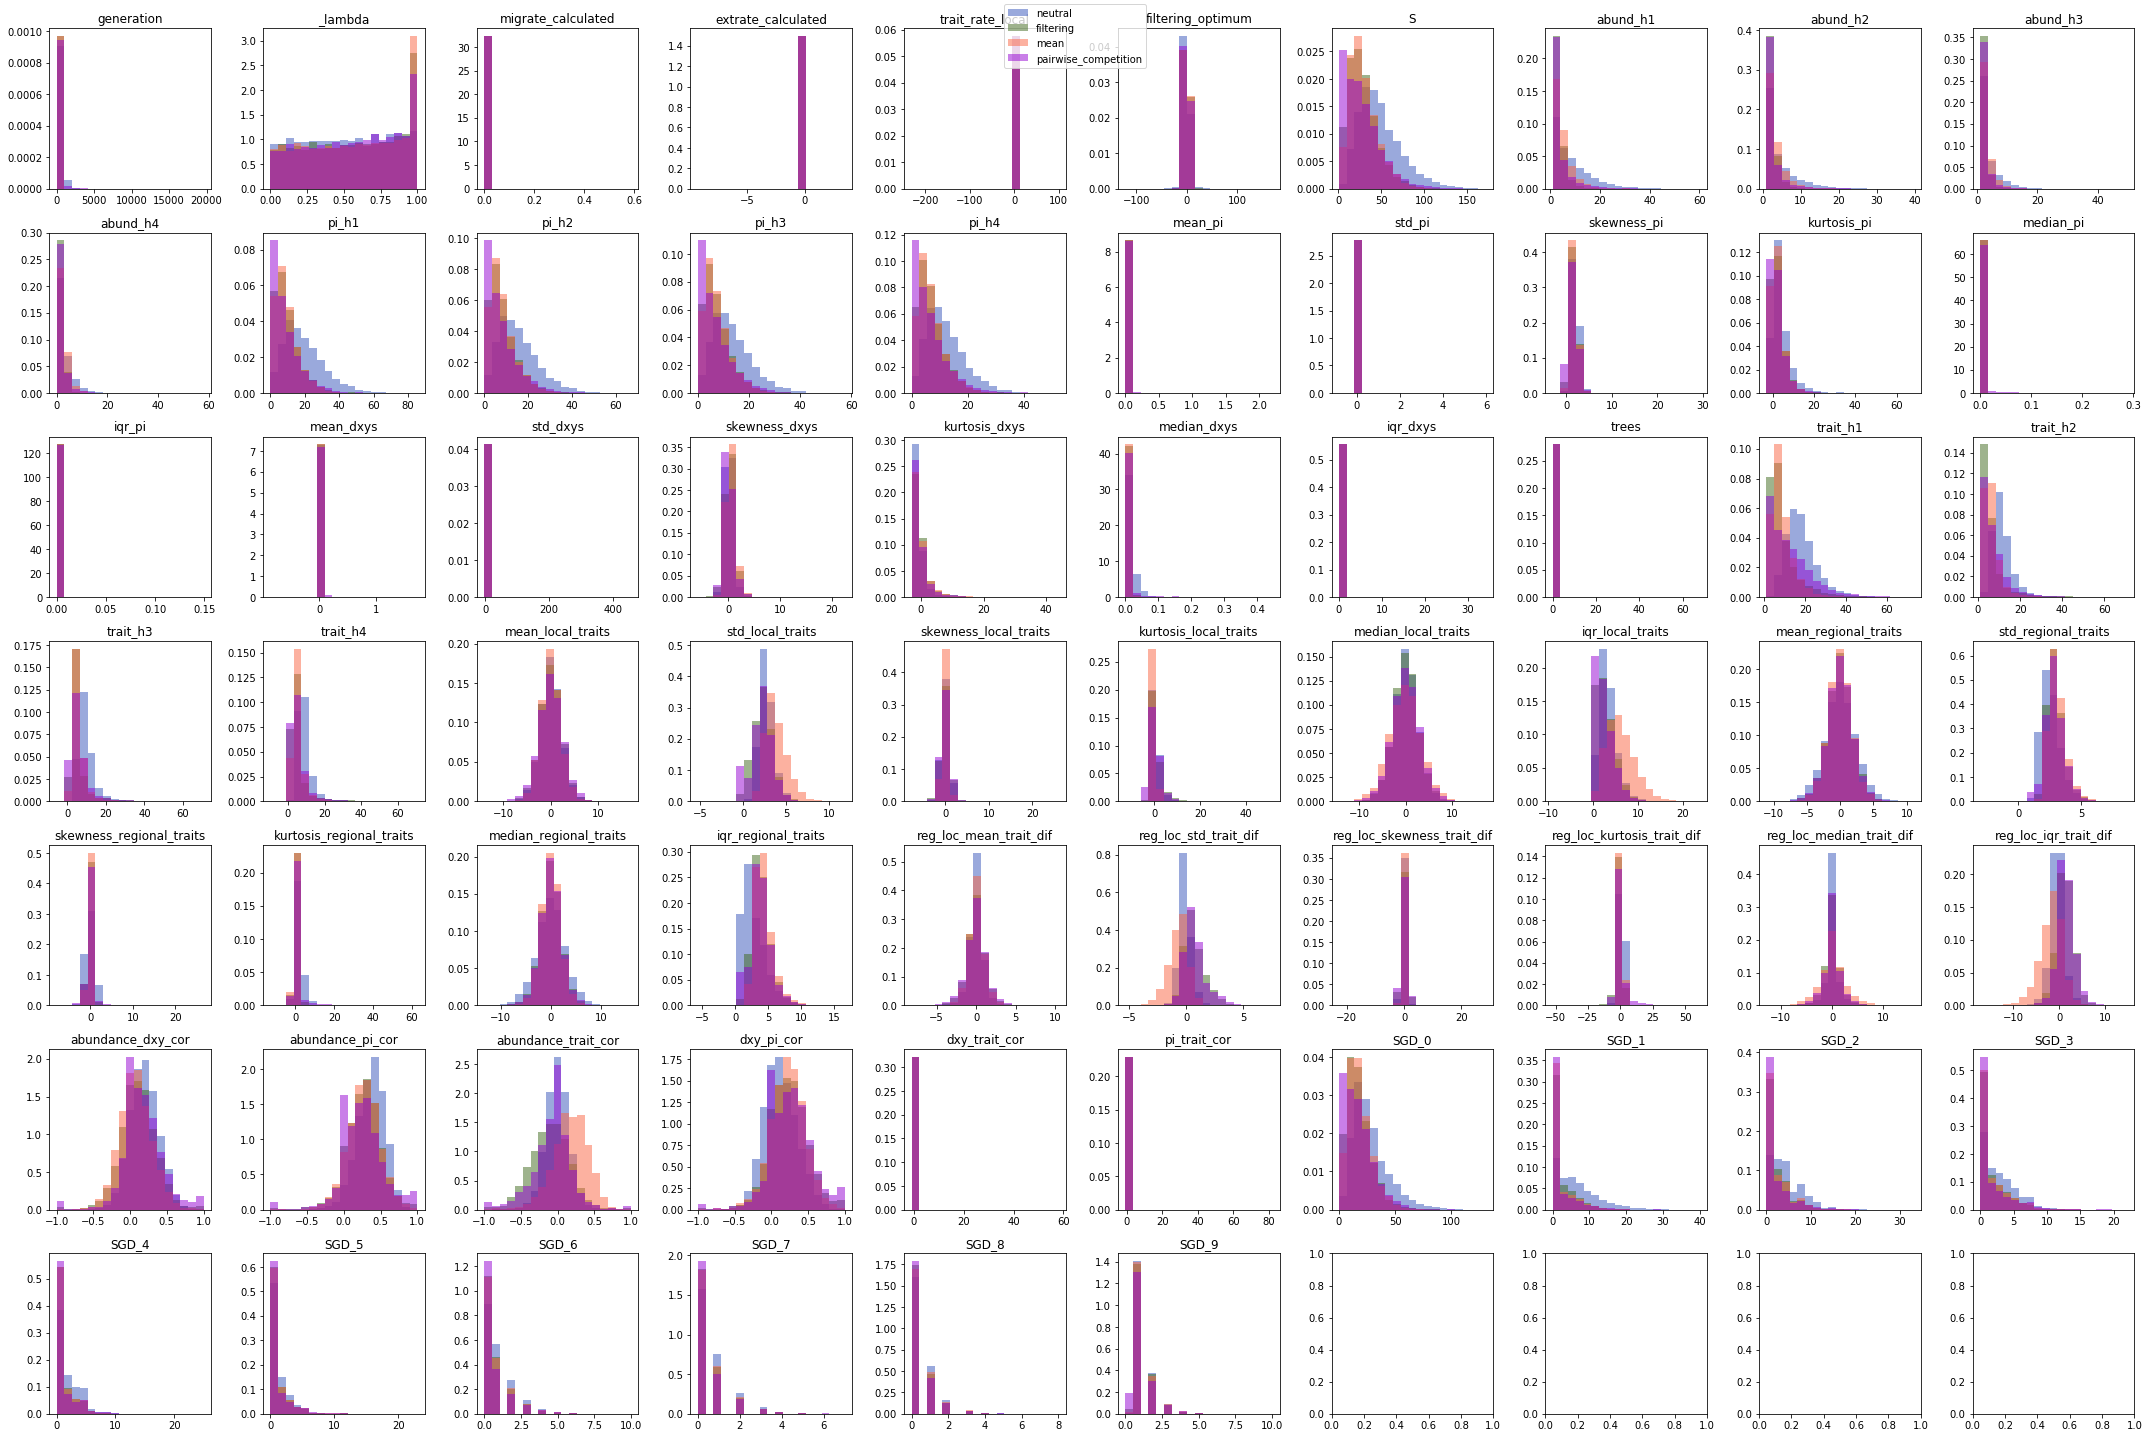

In [148]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering

fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(neutral.columns)[20:], axs):
    b=np.linspace(np.min(global_res[p]),np.max(global_res[p]),20)
    ax.hist(neutral[p], color='#3755BB', density=True, bins=b, alpha=0.5, label="neutral")
    ax.hist(filtering[p], color='#3F681C', density=True, bins=b, alpha=0.5, label="filtering")
    ax.hist(mean[p], color='#FB6542', density=True, bins=b, alpha=0.5, label="mean")
    ax.hist(pairwise_competition[p], color='#9400D3', density=True, bins=b, alpha=0.5, label="pairwise_competition")
    #ax.hist(pw_mut[p], color='#774400', density=True, bins=b, alpha=0.5)
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./global_analysis.png')

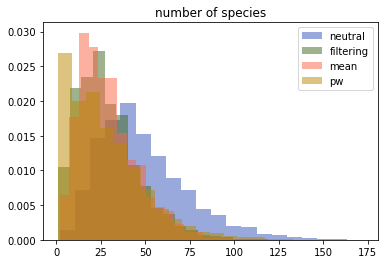

In [149]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering


plt.hist(neutral["S"], color='#3755BB', density=True, bins=20, alpha=0.5, label="neutral")
plt.hist(filtering["S"], color='#3F681C', density=True, bins=20, alpha=0.5, label="filtering")
plt.hist(mean["S"], color='#FB6542', density=True, bins=20, alpha=0.5, label="mean")
plt.hist(pairwise_competition["S"], color='#BB8800', density=True, bins=20, alpha=0.5, label="pw")
plt.title("number of species")
plt.legend()
plt.savefig('./number_species_comparison.png')

In [150]:
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="500.0"]
print(pairwise_competition.shape)

(11536, 86)
(5127, 86)


In [151]:
pw_nomut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="0.0"]
pw_mut=pairwise_competition[pairwise_competition["mutualism_proportion"]!="0.0"]
pw_mut=pw_mut[pw_mut["mutualism_proportion"]!="1.0"]
pw_allmut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="1.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))
pw_nomut=pw_nomut[pw_nomut["generations"]=="500.0"]
pw_mut=pw_mut[pw_mut["generations"]=="500.0"]
pw_allmut=pw_allmut[pw_allmut["generations"]=="500.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))

2418 1898 811
2418 1898 811


In [152]:
pw_low = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])<0.1]
pw_high = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.9]
pw_close = pd.concat([pw_low,pw_high])

pw_tot = pd.concat([pw_nomut, pw_allmut])

pw_mid = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.1]
pw_mid = pw_far[pd.to_numeric(pw_far["mutualism_proportion"])<0.9]

/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


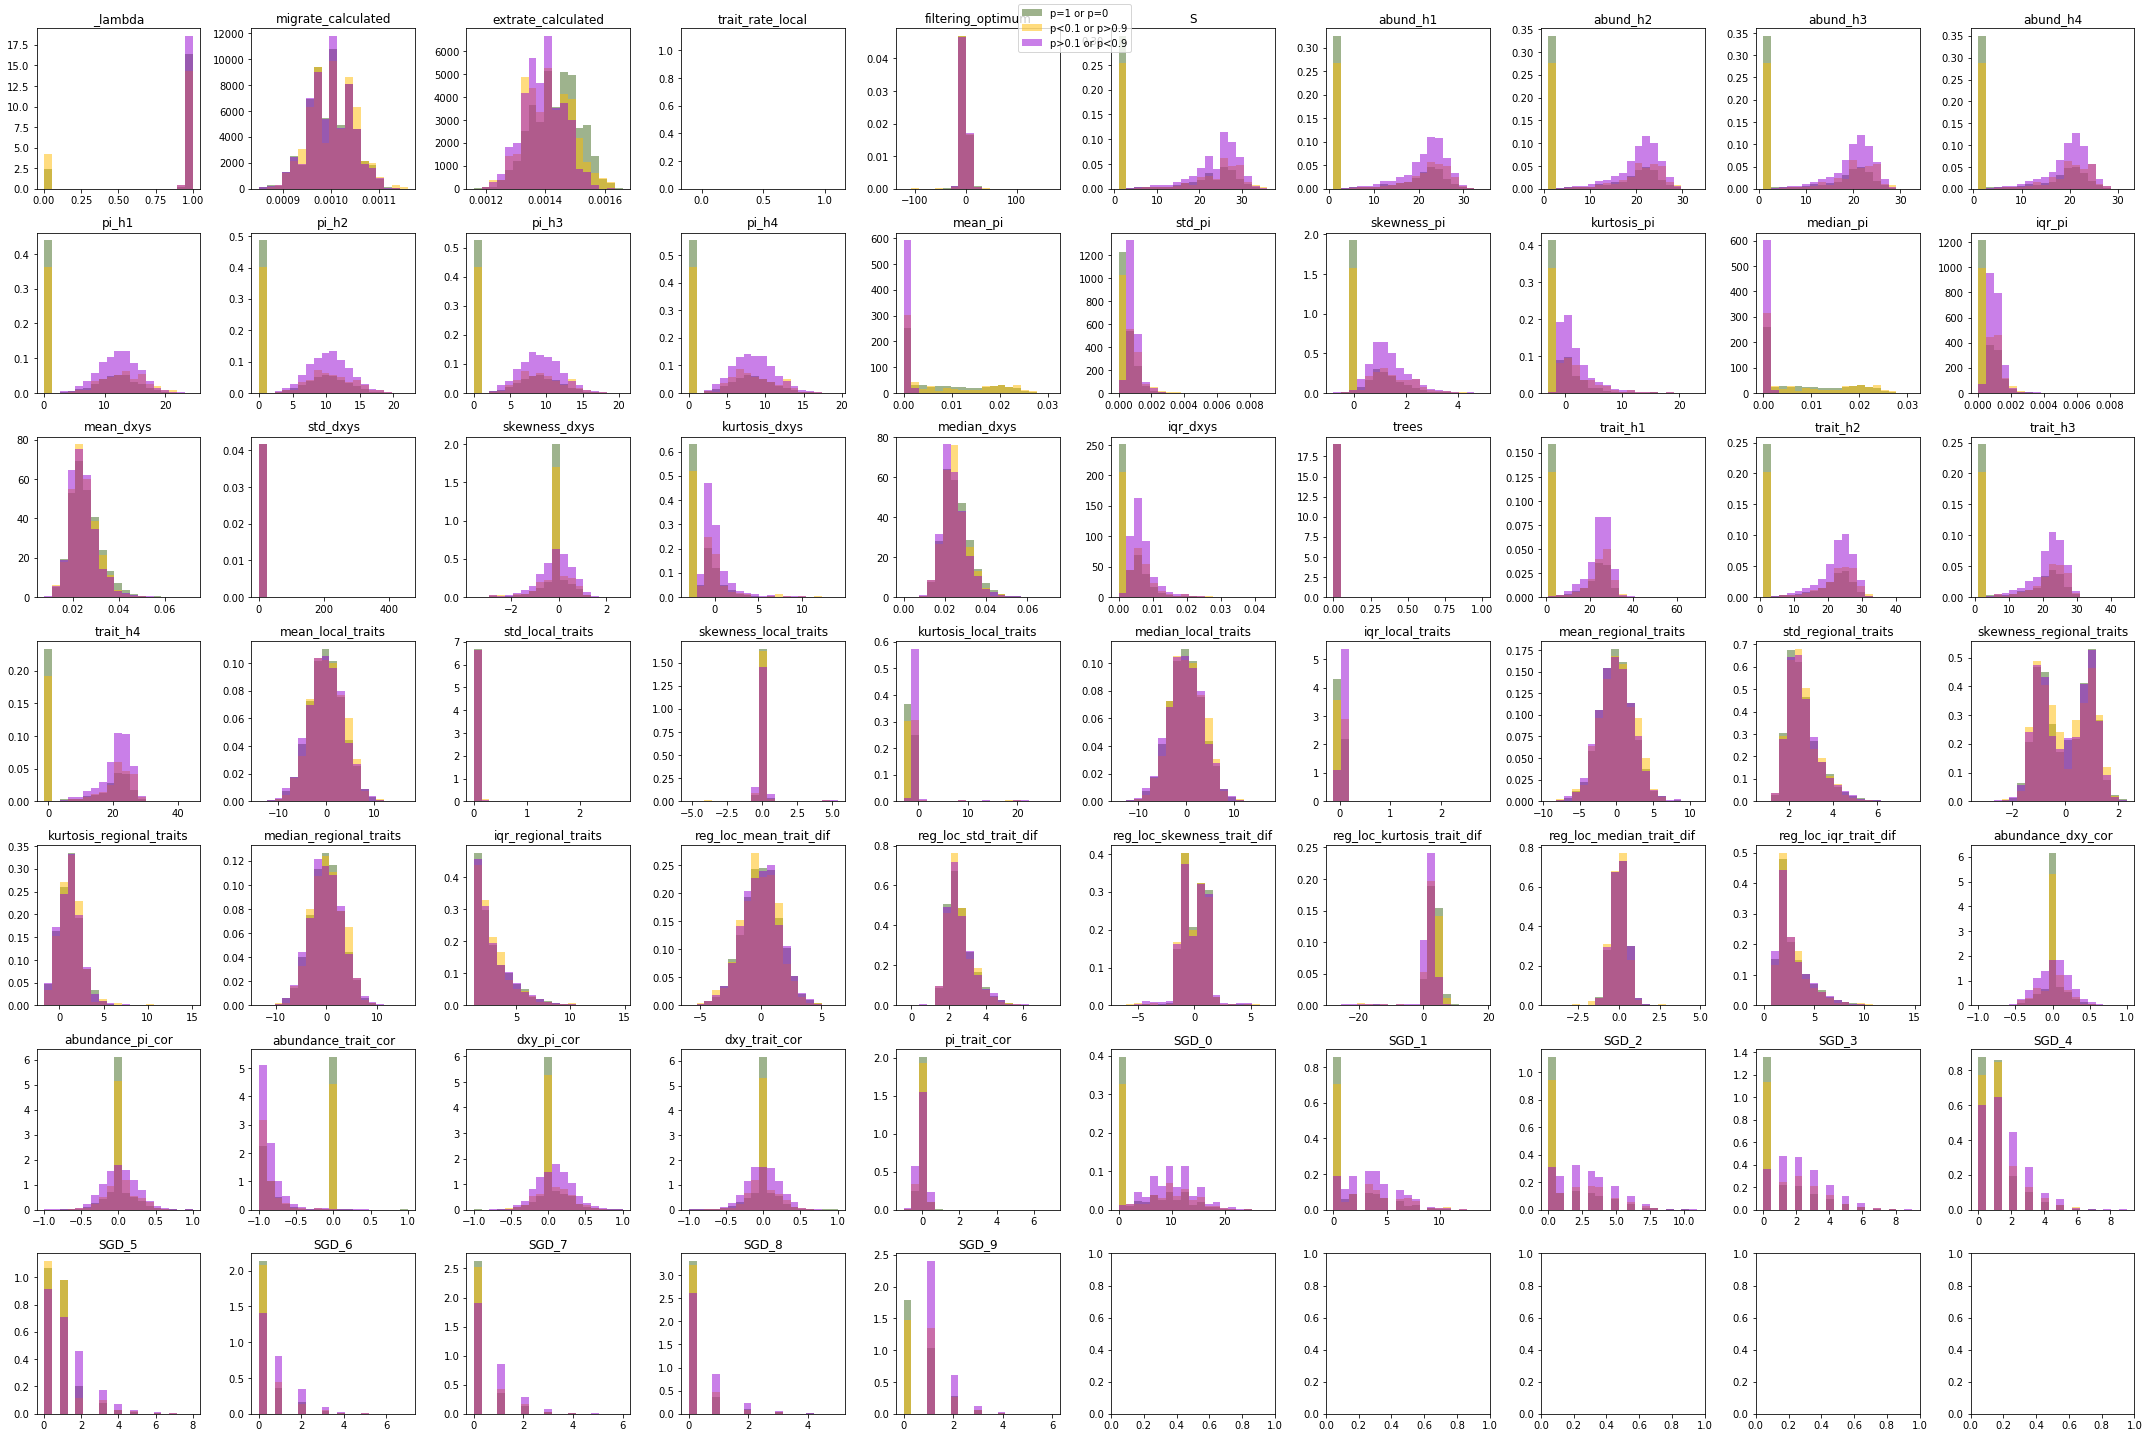

In [153]:
#light yellow is no mutualism
#green is with mutualism
########green is all pairwise
#purple is mutualism=1
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_tot[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=1 or p=0')
    ax.hist(pw_close[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='p<0.1 or p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./pairwise_analysis.png')

It is shown here that there is a discontinuity with the mutualism proportion : can not be estimated thourgh classical regression ?

In [154]:
# Test discontinuity for interaction terms (all same VS existing variations)
# Test afterward with difference intraspecific/interspecific ? (all same VS divergence between both ?)

pw_const=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) == -1.0]
print(pw_const.shape)
pw_var=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) != -1.0]
print(pw_var.shape)
pw_allmostcont=pw_var[pd.to_numeric(pw_var["intersp_competition_a"])*pd.to_numeric(pw_var["intersp_competition_b"])**2<0.09]
pw_allmostcont=pw_allmostcont[pd.to_numeric(pw_allmostcont["intrasp_competition_a"])*pd.to_numeric(pw_allmostcont["intrasp_competition_b"])**2<0.09]

print(pw_allmostcont.shape)


(5127, 86)
(0, 86)
(0, 86)


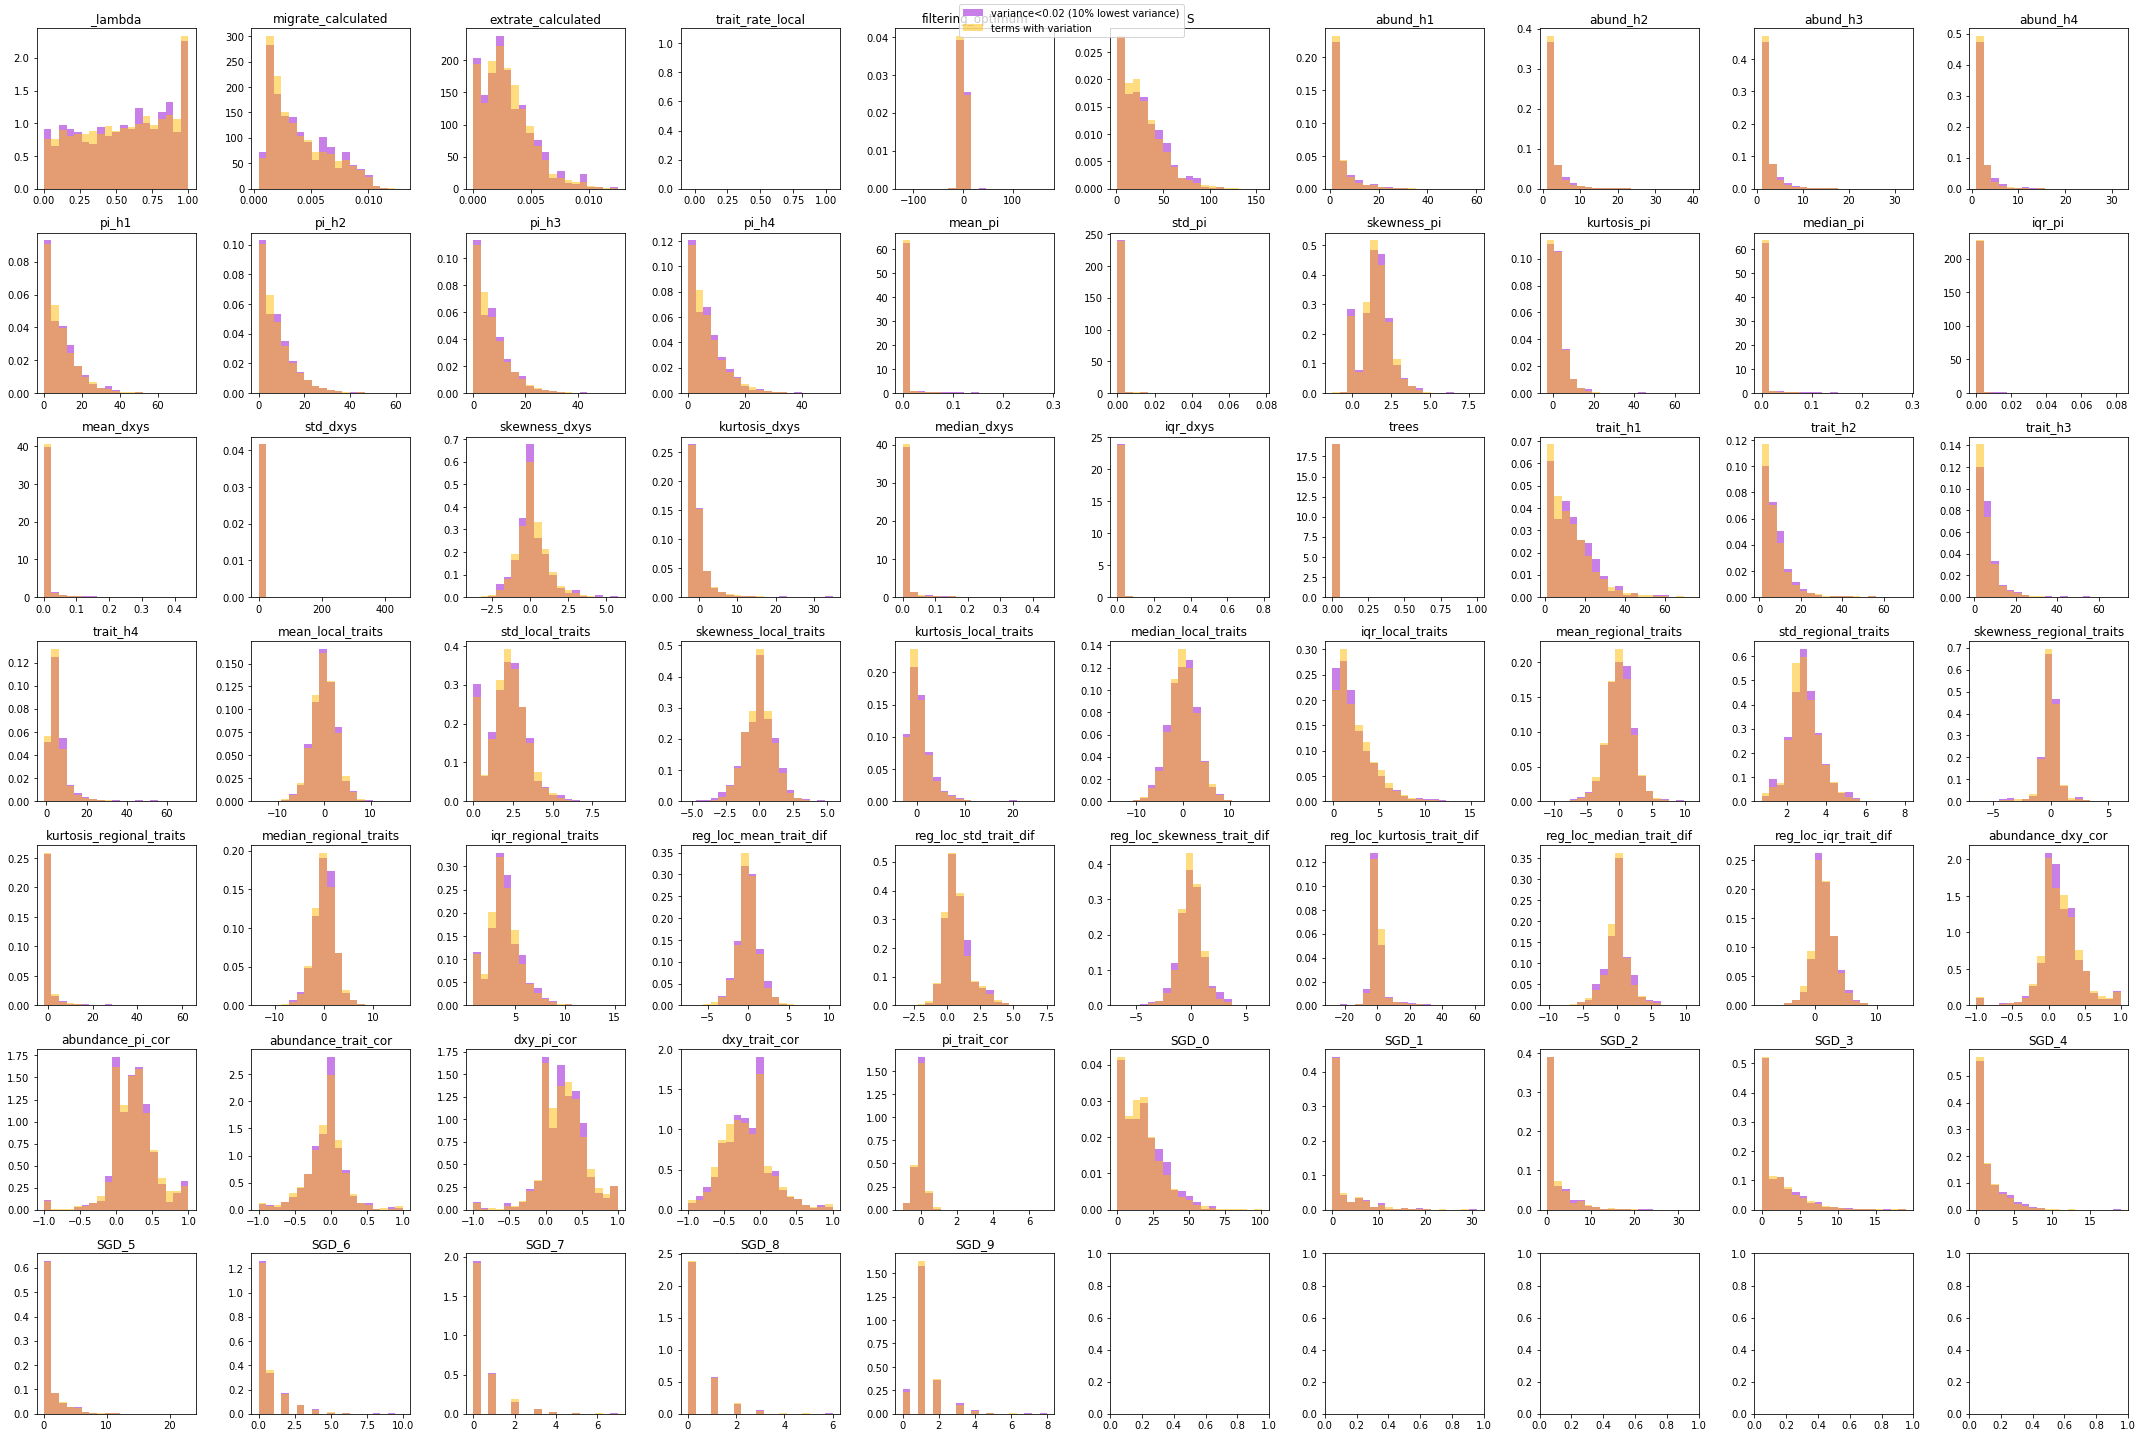

In [130]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_allmostcont[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='variance<0.02 (10% lowest variance)')
    ax.hist(pw_var[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='terms with variation')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis.png')

In [186]:
pw_500=pairwise_competition[pairwise_competition["generations"]=="500.0"]
pw_id=pw_500[pw_500["intersp_competition_a"]==pw_500["intrasp_competition_a"]]
print(pw_500.shape, pw_id.shape)
pw_close=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])<0.01]
pw_close=pw_close[pw_close["intersp_competition_a"]!=pw_close["intrasp_competition_a"]]
pw_far=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])>0.01]
print(pw_close.shape, pw_far.shape)

(5127, 86) (356, 86)
(2612, 86) (2159, 86)


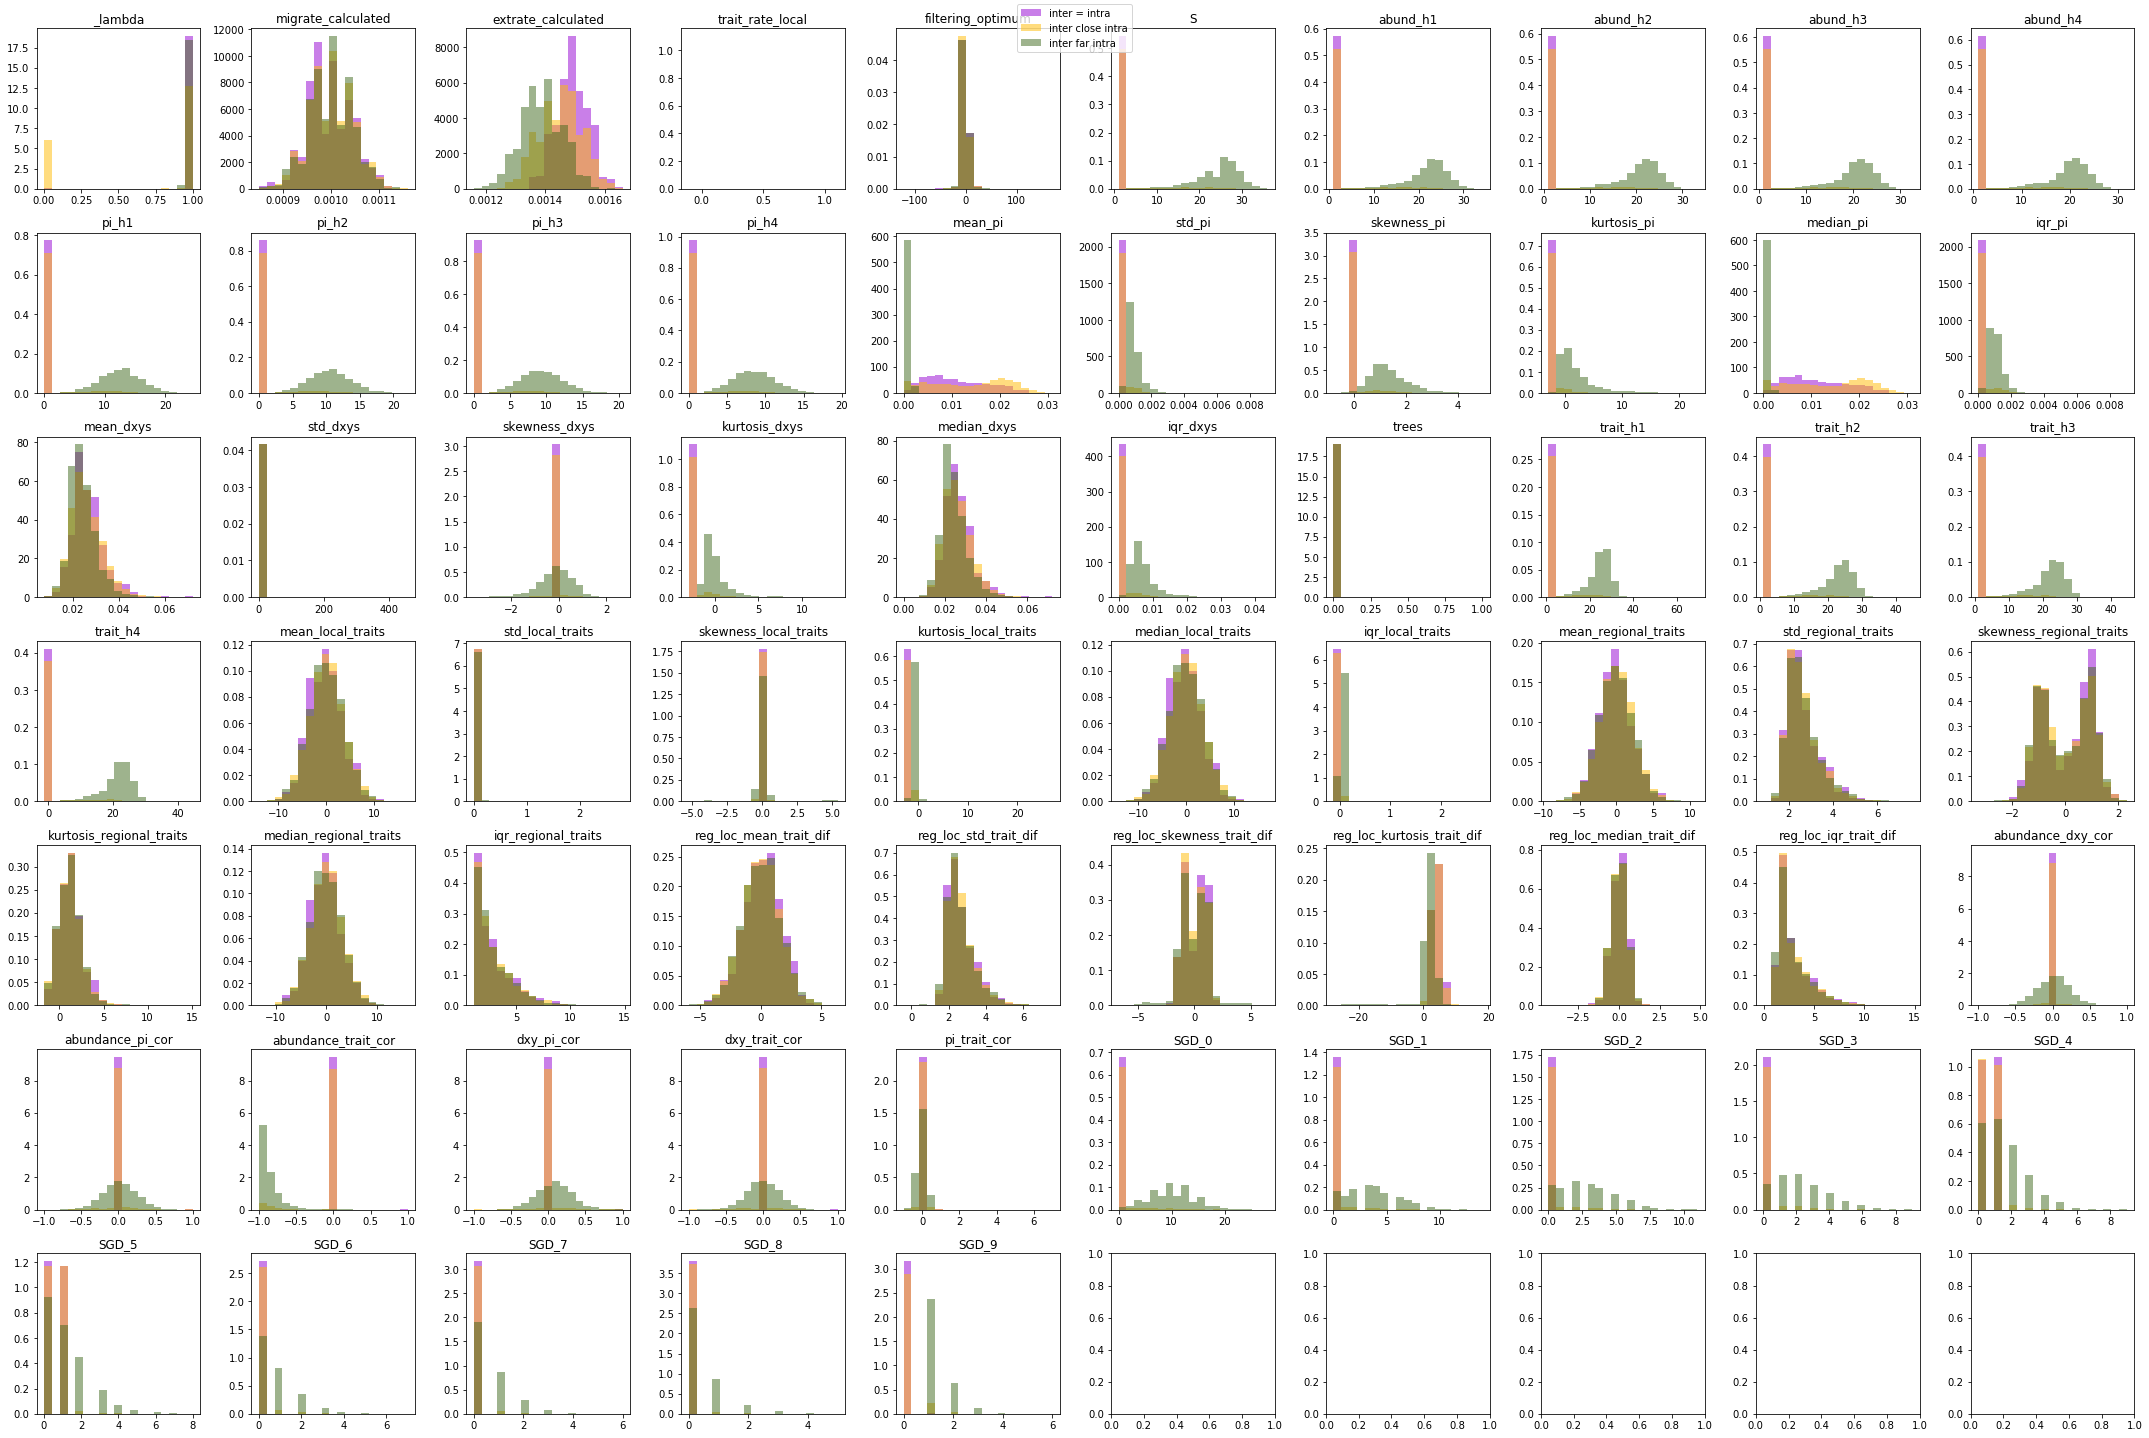

In [178]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_id[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
    ax.hist(pw_close[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
    ax.hist(pw_far[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_comp_terms.png')

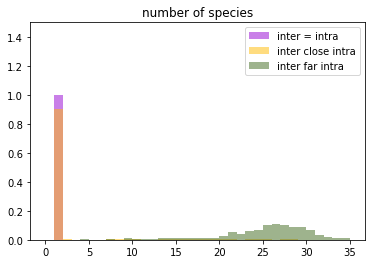

In [188]:
pw_id=pw_id[pw_id["mutualism_proportion"]!="0.0"]
pw_id=pw_id[pw_id["mutualism_proportion"]!="1.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="0.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="1.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="0.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="1.0"]

b = np.arange(0,np.max(pw_500["S"]))
plt.hist(pw_id["S"], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
plt.hist(pw_close["S"], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
plt.hist(pw_far["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
plt.title("number of species")
plt.legend()
plt.ylim(0,1.5)
plt.savefig('./number_species_comparison_term.png')

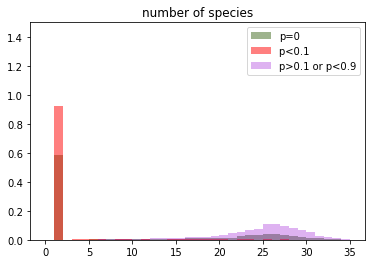

In [180]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_tot[pw_tot["mutualism_proportion"]=="0.0"]
pw1=pw_tot[pw_tot["mutualism_proportion"]=="1.0"]
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
#plt.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
#plt.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1.5)
plt.savefig('./number_species_comparison_mut0.png')

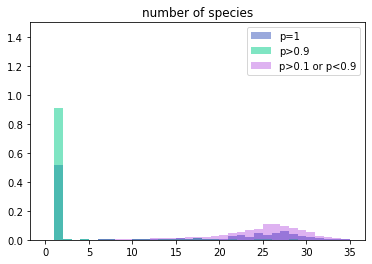

In [181]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_tot[pw_tot["mutualism_proportion"]=="0.0"]
pw1=pw_tot[pw_tot["mutualism_proportion"]=="1.0"]
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
#plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
plt.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
#plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
plt.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1.5)
plt.savefig('./number_species_comparison_mut1.png')